In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
boxscores = pd.read_csv("../data/boxscore_full.csv",sep=";")

boxscores.head()

,matchId,team,number,name,sec,2P_P,2P_A,2P_R,3P_P,3P_A,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
0,101059,Science City Jena,5.0,Kendall Chones,944,2,3,0.67,0,0,...,1,0.0,4.0,0.0,3,4,1.0,1.0,1,6.0
1,101059,Science City Jena,7.0,Ermen Reyes-Napoles,1486,2,4,0.50,1,1,...,2,1.0,9.0,1.0,4,4,0.0,4.0,1,15.0
2,101059,Science City Jena,8.0,Lukas Wank,0,0,0,0.00,0,0,...,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0
3,101059,Science City Jena,9.0,Lars Wendt,1491,2,2,1.00,0,2,...,0,0.0,4.0,1.0,1,1,0.0,0.0,4,0.0
4,101059,Science City Jena,10.0,Sascha Leutloff,665,1,3,0.33,0,0,...,2,1.0,4.0,0.0,3,1,1.0,0.0,2,4.0


In [3]:
reduced = boxscores.drop(columns=["number","name"])

reduced.head()

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
0,101059,Science City Jena,944,2,3,0.67,0,0,0.0,2,...,1,0.0,4.0,0.0,3,4,1.0,1.0,1,6.0
1,101059,Science City Jena,1486,2,4,0.50,1,1,1.0,3,...,2,1.0,9.0,1.0,4,4,0.0,4.0,1,15.0
2,101059,Science City Jena,0,0,0,0.00,0,0,0.0,0,...,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0
3,101059,Science City Jena,1491,2,2,1.00,0,2,0.0,2,...,0,0.0,4.0,1.0,1,1,0.0,0.0,4,0.0
4,101059,Science City Jena,665,1,3,0.33,0,0,0.0,1,...,2,1.0,4.0,0.0,3,1,1.0,0.0,2,4.0


In [4]:
bymatch = reduced.groupby(["matchId", "team"]).sum().reset_index()
bymatch.head()

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
0,100002,TEAM EHINGEN URSPRING,11357,16,39,2.03,4,14,1.08,20,...,26,3.73,63.0,16.0,25,19,3.0,6.0,13,60.0
1,100002,undefined,0,0,0,0.00,0,0,0.00,0,...,0,0.00,0.0,0.0,36,26,0.0,0.0,15,21.0
2,100003,ETB Wohnbau Baskets Essen,12000,26,43,4.56,7,21,1.12,33,...,30,4.97,96.0,15.0,36,24,2.0,9.0,9,111.0
3,100003,NINERS CHEMNITZ,12000,23,42,3.09,3,20,0.62,26,...,34,6.46,82.0,9.0,36,23,0.0,6.0,13,77.0
4,100004,Bayer Giants Leverkusen,12000,13,31,1.39,10,33,1.40,23,...,12,1.42,63.0,13.0,34,18,2.0,7.0,11,62.0


In [5]:
bymatch[bymatch["sec"] > 12000].shape[0]

221

In [6]:
bymatch.query("matchId == 107421")

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
3517,107421,Artland Dragons,12000,19,39,2.54,10,23,3.74,29,...,19,4.05,81.0,15.0,39,19,3.0,5.0,13,91.0
3518,107421,Science City Jena,12000,25,50,5.43,7,21,2.52,32,...,15,3.71,84.0,16.0,35,19,3.0,5.0,6,96.0


In [7]:
test = bymatch[bymatch["sec"] > 12000]

test.head(10)

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
16,100010,NINERS CHEMNITZ,15003,26,60,2.42,6,24,0.97,32,...,24,4.97,87.0,18.0,49,17,6.0,12.0,13,100.0
17,100010,VfL Kirchheim Knights,15000,25,53,3.09,8,27,1.93,33,...,15,3.50,82.0,17.0,52,24,2.0,7.0,21,85.0
28,100016,Bayer Giants Leverkusen,16312,13,26,2.66,11,45,3.59,24,...,35,3.87,80.0,20.0,48,25,3.0,3.0,19,74.0
29,100016,GIESSEN 46ers,22222,36,81,6.52,8,23,3.48,44,...,48,5.94,118.0,19.0,46,28,1.0,14.0,18,94.0
32,100018,NINERS CHEMNITZ,15000,21,42,4.55,10,23,4.64,31,...,24,4.75,90.0,19.0,40,22,3.0,6.0,16,102.0
33,100018,finke baskets,15000,19,42,3.64,15,32,2.79,34,...,26,2.11,96.0,16.0,40,26,2.0,10.0,16,95.0
46,100025,GIESSEN 46ers,13500,21,48,3.25,8,19,2.23,29,...,33,4.76,87.0,22.0,37,28,6.0,8.0,15,95.0
47,100025,Science City Jena,13500,27,47,5.25,6,20,2.00,33,...,23,3.44,85.0,22.0,41,29,9.0,8.0,16,105.0
56,100030,MLP Academics Heidelberg,13500,26,57,2.91,7,23,1.85,33,...,17,2.94,84.0,16.0,43,18,6.0,9.0,18,87.0
57,100030,VfL Kirchheim Knights,13500,27,52,4.34,3,18,1.08,30,...,22,5.22,81.0,12.0,45,20,8.0,5.0,20,87.0


In [8]:
bymatch[bymatch["sec"] < 12000].shape[0]

24

In [9]:
bymatch[bymatch["sec"] < 12000].head(10)

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
0,100002,TEAM EHINGEN URSPRING,11357,16,39,2.03,4,14,1.08,20,...,26,3.73,63.0,16.0,25,19,3.0,6.0,13,60.0
1,100002,undefined,0,0,0,0.00,0,0,0.00,0,...,0,0.00,0.0,0.0,36,26,0.0,0.0,15,21.0
116,100060,RASTA Vechta,11900,30,44,6.60,5,21,1.13,35,...,30,6.10,96.0,20.0,43,20,1.0,6.0,12,115.0
117,100060,VfL Kirchheim Knights,11869,21,47,3.57,7,25,1.91,28,...,22,5.83,78.0,8.0,36,28,2.0,6.0,12,67.0
247,100125,finke baskets,11595,15,32,5.50,7,30,1.46,22,...,17,4.00,65.0,14.0,30,13,5.0,15.0,14,72.0
476,100240,OeTTINGER Rockets Gotha,11400,25,43,5.13,5,18,2.66,30,...,15,3.80,74.0,13.0,34,23,0.0,5.0,20,69.0
620,101444,undefined,0,0,0,0.00,0,0,0.00,0,...,0,0.00,0.0,0.0,72,39,0.0,0.0,36,36.0
807,101539,ETB Wohnbau Baskets Essen,11975,16,30,6.08,5,22,0.77,21,...,18,3.46,61.0,18.0,31,24,4.0,3.0,16,66.0
1679,103641,MLP Academics Heidelberg,11655,18,41,4.07,9,20,1.67,27,...,25,6.69,83.0,18.0,36,20,6.0,9.0,14,99.0
1693,103648,NINERS Chemnitz,11998,25,39,6.23,4,23,1.62,29,...,7,3.50,68.0,19.0,39,22,0.0,2.0,16,78.0


vorerst nur mit "normalen" Spielen weiterarbeiten

In [10]:
new = bymatch[bymatch["sec"] >= 12000 ]
new = new[new['sec'] <= 12500]

In [11]:

new.shape[0]

3916

In [12]:
new.query("matchId == 101566")

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
861,101566,HEBEISEN WHITE WINGS Hanau,12000,14,32,2.27,6,26,1.14,20,...,13,2.8,57.0,9.0,40,22,4.0,7.0,17,60.0
862,101566,OeTTINGER Rockets Gotha,12002,15,38,3.00,4,19,1.50,19,...,25,4.9,61.0,6.0,36,19,2.0,8.0,15,54.0


In [13]:
new.head()

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
2,100003,ETB Wohnbau Baskets Essen,12000,26,43,4.56,7,21,1.12,33,...,30,4.97,96.0,15.0,36,24,2.0,9.0,9,111.0
3,100003,NINERS CHEMNITZ,12000,23,42,3.09,3,20,0.62,26,...,34,6.46,82.0,9.0,36,23,0.0,6.0,13,77.0
4,100004,Bayer Giants Leverkusen,12000,13,31,1.39,10,33,1.40,23,...,12,1.42,63.0,13.0,34,18,2.0,7.0,11,62.0
5,100004,RASTA Vechta,12000,22,41,4.46,5,17,1.57,27,...,15,3.75,71.0,15.0,81,36,1.0,3.0,30,107.0
6,100005,OeTTINGER Rockets Gotha,12000,18,45,2.93,5,18,2.06,23,...,24,4.92,70.0,10.0,41,17,4.0,2.0,11,71.0


In [14]:
test = new.head(6)
test.head(6)

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_A,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs
2,100003,ETB Wohnbau Baskets Essen,12000,26,43,4.56,7,21,1.12,33,...,30,4.97,96.0,15.0,36,24,2.0,9.0,9,111.0
3,100003,NINERS CHEMNITZ,12000,23,42,3.09,3,20,0.62,26,...,34,6.46,82.0,9.0,36,23,0.0,6.0,13,77.0
4,100004,Bayer Giants Leverkusen,12000,13,31,1.39,10,33,1.40,23,...,12,1.42,63.0,13.0,34,18,2.0,7.0,11,62.0
5,100004,RASTA Vechta,12000,22,41,4.46,5,17,1.57,27,...,15,3.75,71.0,15.0,81,36,1.0,3.0,30,107.0
6,100005,OeTTINGER Rockets Gotha,12000,18,45,2.93,5,18,2.06,23,...,24,4.92,70.0,10.0,41,17,4.0,2.0,11,71.0
7,100005,finke baskets,12000,19,43,2.55,9,24,1.54,28,...,11,2.42,72.0,10.0,43,23,5.0,2.0,18,71.0


In [15]:
diff = []
for index, row in test.iterrows():
    diff.append(row['Ps'] - test.loc[(test['matchId'] == row['matchId']) & (test['team'] != row['team']), 'Ps'].sum())

test['P_diff'] = diff
test.head(6)    

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs,P_diff
2,100003,ETB Wohnbau Baskets Essen,12000,26,43,4.56,7,21,1.12,33,...,4.97,96.0,15.0,36,24,2.0,9.0,9,111.0,14.0
3,100003,NINERS CHEMNITZ,12000,23,42,3.09,3,20,0.62,26,...,6.46,82.0,9.0,36,23,0.0,6.0,13,77.0,-14.0
4,100004,Bayer Giants Leverkusen,12000,13,31,1.39,10,33,1.40,23,...,1.42,63.0,13.0,34,18,2.0,7.0,11,62.0,-8.0
5,100004,RASTA Vechta,12000,22,41,4.46,5,17,1.57,27,...,3.75,71.0,15.0,81,36,1.0,3.0,30,107.0,8.0
6,100005,OeTTINGER Rockets Gotha,12000,18,45,2.93,5,18,2.06,23,...,4.92,70.0,10.0,41,17,4.0,2.0,11,71.0,-2.0
7,100005,finke baskets,12000,19,43,2.55,9,24,1.54,28,...,2.42,72.0,10.0,43,23,5.0,2.0,18,71.0,2.0


In [16]:
type(test)

pandas.core.frame.DataFrame

In [17]:
def P_diff_calculator(df : pd.DataFrame):
    diff = []
    for index, row in df.iterrows():
        diff.append(row['Ps'] - df.loc[(df['matchId'] == row['matchId']) & (df['team'] != row['team']), 'Ps'].sum())

    df['P_diff'] = diff

    return df
    

In [18]:
new = P_diff_calculator(new)
new.head()

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,FT_R,Ps,As,Rs,Fs,BLs,STs,TOs,EFs,P_diff
2,100003,ETB Wohnbau Baskets Essen,12000,26,43,4.56,7,21,1.12,33,...,4.97,96.0,15.0,36,24,2.0,9.0,9,111.0,14.0
3,100003,NINERS CHEMNITZ,12000,23,42,3.09,3,20,0.62,26,...,6.46,82.0,9.0,36,23,0.0,6.0,13,77.0,-14.0
4,100004,Bayer Giants Leverkusen,12000,13,31,1.39,10,33,1.40,23,...,1.42,63.0,13.0,34,18,2.0,7.0,11,62.0,-8.0
5,100004,RASTA Vechta,12000,22,41,4.46,5,17,1.57,27,...,3.75,71.0,15.0,81,36,1.0,3.0,30,107.0,8.0
6,100005,OeTTINGER Rockets Gotha,12000,18,45,2.93,5,18,2.06,23,...,4.92,70.0,10.0,41,17,4.0,2.0,11,71.0,-2.0


In [19]:
full = new.drop(columns=['matchId','team'])
corr_full = full.corr()
print(corr_full)


             sec      2P_P      2P_A      2P_R      3P_P      3P_A      3P_R  \
sec     1.000000  0.007985  0.020701 -0.003476 -0.023126 -0.000589 -0.011478   
2P_P    0.007985  1.000000  0.637785  0.548926 -0.156795 -0.245239 -0.023283   
2P_A    0.020701  0.637785  1.000000  0.015482 -0.343712 -0.406685 -0.149315   
2P_R   -0.003476  0.548926  0.015482  1.000000  0.102310  0.055073  0.161256   
3P_P   -0.023126 -0.156795 -0.343712  0.102310  1.000000  0.657687  0.684926   
3P_A   -0.000589 -0.245239 -0.406685  0.055073  0.657687  1.000000  0.207489   
3P_R   -0.011478 -0.023283 -0.149315  0.161256  0.684926  0.207489  1.000000   
FG_P   -0.007272  0.789978  0.352536  0.550587  0.481688  0.190697  0.404553   
FG_A    0.019700  0.413926  0.630165  0.061915  0.223583  0.453072  0.030646   
FG_R   -0.004974  0.468628 -0.000736  0.802454  0.339673  0.019663  0.516916   
FT_P   -0.010007 -0.071662 -0.130923  0.011517 -0.093596 -0.128496 -0.039605   
FT_A   -0.018775 -0.092269 -0.130611 -0.

In [20]:
corr_full['P_diff']

sec       0.003050
2P_P      0.392705
2P_A      0.090404
2P_R      0.359698
3P_P      0.362659
3P_A      0.087832
3P_R      0.327432
FG_P      0.573598
FG_A      0.162868
FG_R      0.453736
FT_P      0.161113
FT_A      0.127807
FT_R      0.177824
Ps        0.626250
As        0.483732
Rs        0.216301
Fs       -0.040673
BLs       0.140036
STs       0.257101
TOs      -0.157751
EFs       0.743358
P_diff    1.000000
Name: P_diff, dtype: float64

<AxesSubplot:>

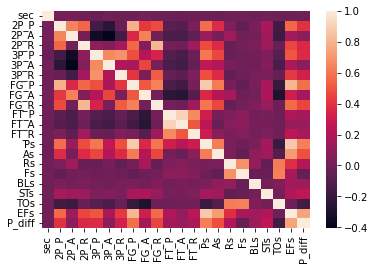

In [21]:
sns.heatmap(corr_full, xticklabels= corr_full.columns, yticklabels=corr_full.columns)

In [22]:
data14 = new[new['matchId'].between(100000,100999)]
data15 = new[new['matchId'].between(101000,101999)]
data16 = new[new['matchId'].between(102000,102999)]
data17 = new[new['matchId'].between(103000,103999)]
data18 = new[new['matchId'].between(104000,104999)]
data19 = new[new['matchId'].between(105000,105999)]
data20 = new[new['matchId'].between(106000,107999)]
data21 = new[new['matchId'].between(108000,108999)]


In [23]:
data = [data14, data15, data16, data17, data18, data19, data20, data21]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
diffcolumns = []

for i in range(len(data)):
    data[i].drop(columns=['matchId'],inplace=True)
    corr = data[i].corr()
    diffcolumn = corr['P_diff']
    diffcolumn.rename(years[i], inplace=True)

    diffcolumns.append(diffcolumn)

diffcolumns


[sec       0.027720
 2P_P      0.478030
 2P_A      0.143573
 2P_R      0.401841
 3P_P      0.213126
 3P_A     -0.095794
 3P_R      0.282312
 FG_P      0.572857
 FG_A      0.070110
 FG_R      0.453114
 FT_P      0.229087
 FT_A      0.200566
 FT_R      0.188482
 Ps        0.614419
 As        0.475300
 Rs        0.200088
 Fs       -0.090634
 BLs       0.124183
 STs       0.246422
 TOs      -0.117936
 EFs       0.732354
 P_diff    1.000000
 Name: 2014, dtype: float64,
 sec       0.048534
 2P_P      0.516237
 2P_A      0.240480
 2P_R      0.380257
 3P_P      0.329703
 3P_A      0.030372
 3P_R      0.368306
 FG_P      0.665089
 FG_A      0.271700
 FG_R      0.450566
 FT_P      0.192956
 FT_A      0.155246
 FT_R      0.165767
 Ps        0.723487
 As        0.493621
 Rs        0.243050
 Fs       -0.010304
 BLs       0.143102
 STs       0.268587
 TOs      -0.149223
 EFs       0.783756
 P_diff    1.000000
 Name: 2015, dtype: float64,
 sec      -0.004488
 2P_P      0.358328
 2P_A      0.003426
 2

In [24]:
df = pd.concat([diffcolumns[0], diffcolumns[1], diffcolumns[2],diffcolumns[3], diffcolumns[4], diffcolumns[5], diffcolumns[6], diffcolumns[7]], axis=1)
df

,2014,2015,2016,2017,2018,2019,2020,2021
sec,0.027720,0.048534,-0.004488,-0.013534,NaN,-0.012266,NaN,NaN
2P_P,0.478030,0.516237,0.358328,0.412145,0.326056,0.355362,0.337032,0.400611
2P_A,0.143573,0.240480,0.003426,0.098266,0.041384,0.036611,0.069393,0.069083
2P_R,0.401841,0.380257,0.407038,0.409294,0.329310,0.249662,0.317666,0.399076
3P_P,0.213126,0.329703,0.432372,0.408362,0.398320,0.427366,0.363251,0.417733
3P_A,-0.095794,0.030372,0.161626,0.183121,0.062460,0.149490,0.086298,0.132944
3P_R,0.282312,0.368306,0.372486,0.347198,0.324123,0.325087,0.309722,0.326302
FG_P,0.572857,0.665089,0.588866,0.629087,0.573222,0.602121,0.569477,0.627759
FG_A,0.070110,0.271700,0.141574,0.239611,0.099259,0.158381,0.143750,0.171221
FG_R,0.453114,0.450566,0.530082,0.466928,0.428553,0.414582,0.435658,0.501393


In [27]:
new.head()

ef_diff = []
for index, row in new.iterrows():
    ef_diff.append(row['EFs'] - new.loc[(new['matchId'] == row['matchId']) & (new['team'] != row['team']), 'EFs'].sum())


new['EF_diff'] = ef_diff
new.head()

,matchId,team,sec,2P_P,2P_A,2P_R,3P_P,3P_A,3P_R,FG_P,...,Ps,As,Rs,Fs,BLs,STs,TOs,EFs,P_diff,EF_diff
2,100003,ETB Wohnbau Baskets Essen,12000,26,43,4.56,7,21,1.12,33,...,96.0,15.0,36,24,2.0,9.0,9,111.0,14.0,34.0
3,100003,NINERS CHEMNITZ,12000,23,42,3.09,3,20,0.62,26,...,82.0,9.0,36,23,0.0,6.0,13,77.0,-14.0,-34.0
4,100004,Bayer Giants Leverkusen,12000,13,31,1.39,10,33,1.40,23,...,63.0,13.0,34,18,2.0,7.0,11,62.0,-8.0,-45.0
5,100004,RASTA Vechta,12000,22,41,4.46,5,17,1.57,27,...,71.0,15.0,81,36,1.0,3.0,30,107.0,8.0,45.0
6,100005,OeTTINGER Rockets Gotha,12000,18,45,2.93,5,18,2.06,23,...,70.0,10.0,41,17,4.0,2.0,11,71.0,-2.0,0.0


In [32]:
new.query("P_diff > 0 and EF_diff == 0").shape[0]

19